In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.manifold import TSNE

from IPython.display import set_matplotlib_formats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
set_matplotlib_formats('retina')
matplotlib.rcParams['figure.figsize'] = (12,9)
pd.set_option('display.max_columns', None) 

In [2]:
dataset_dir = '../../dataset/'
dataset = pd.read_csv(dataset_dir + 'train.csv')

# Dataset

In [3]:
column_name_classes = 'target'

In [4]:
dataset.shape

(61878, 95)

## info about the dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [8]:
dataset.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,0.303468,0.698019,0.451146,0.560829,0.238130,0.641375,0.249669,1.584893,0.348314,0.324283,0.053298,0.213485,0.442063,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,1.085672,1.961189,1.706013,1.346090,2.587131,2.348359,1.446203,2.577071,1.369380,1.720470,0.513820,1.044788,2.006485,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

## number of samples per class

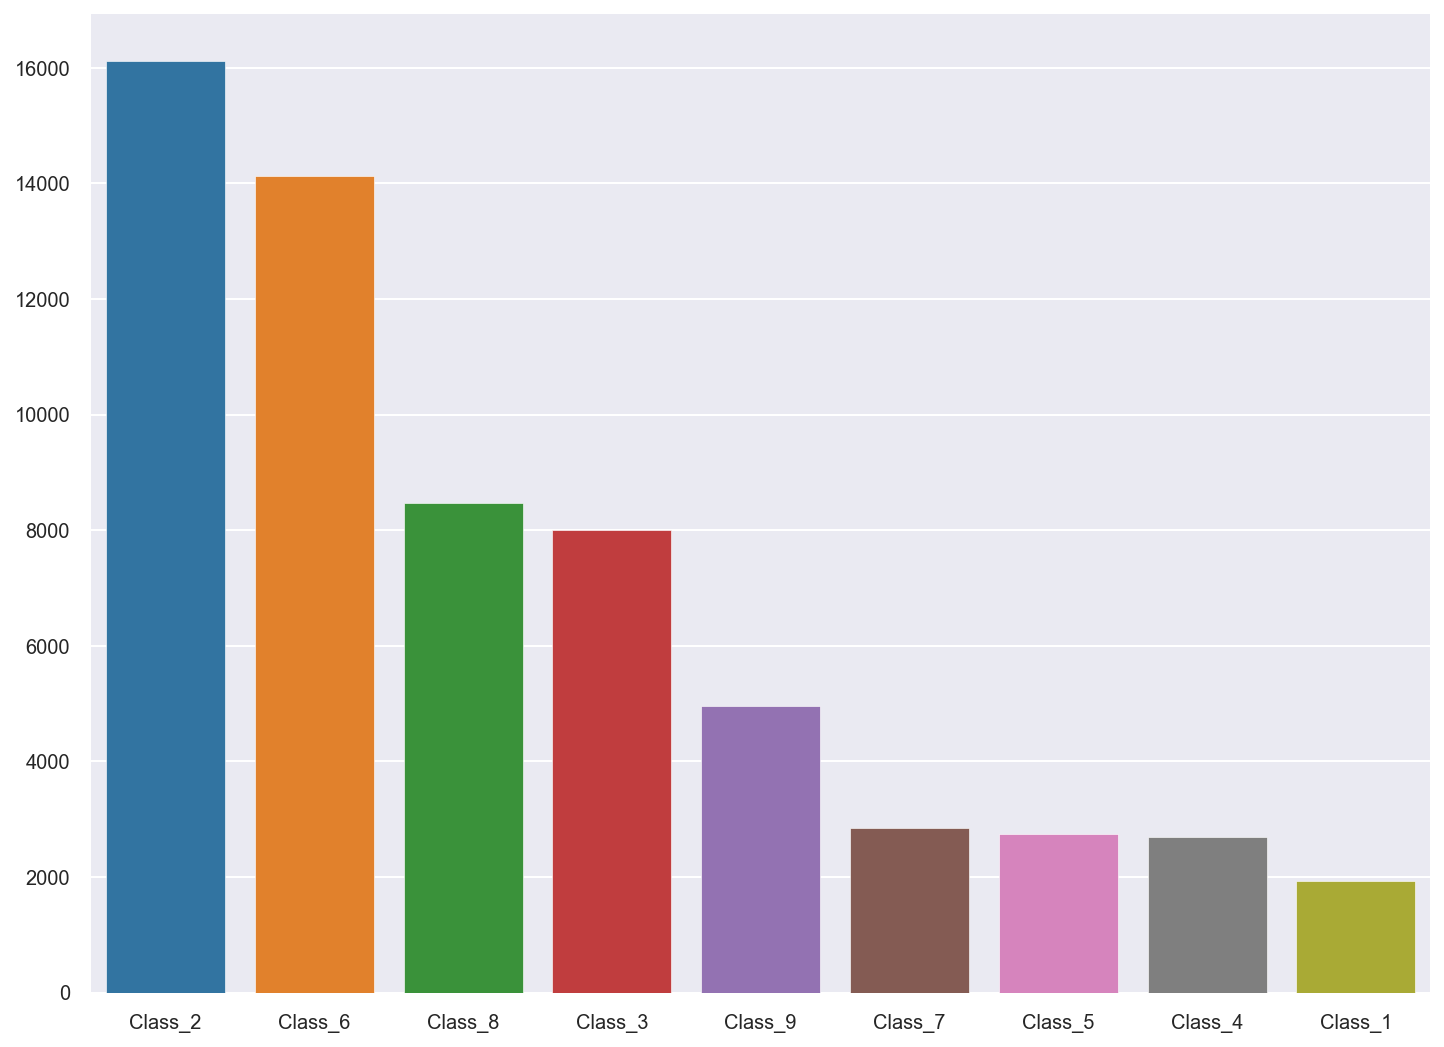

In [5]:
class_counts = dataset[column_name_classes].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values);

## number of unique values per feature

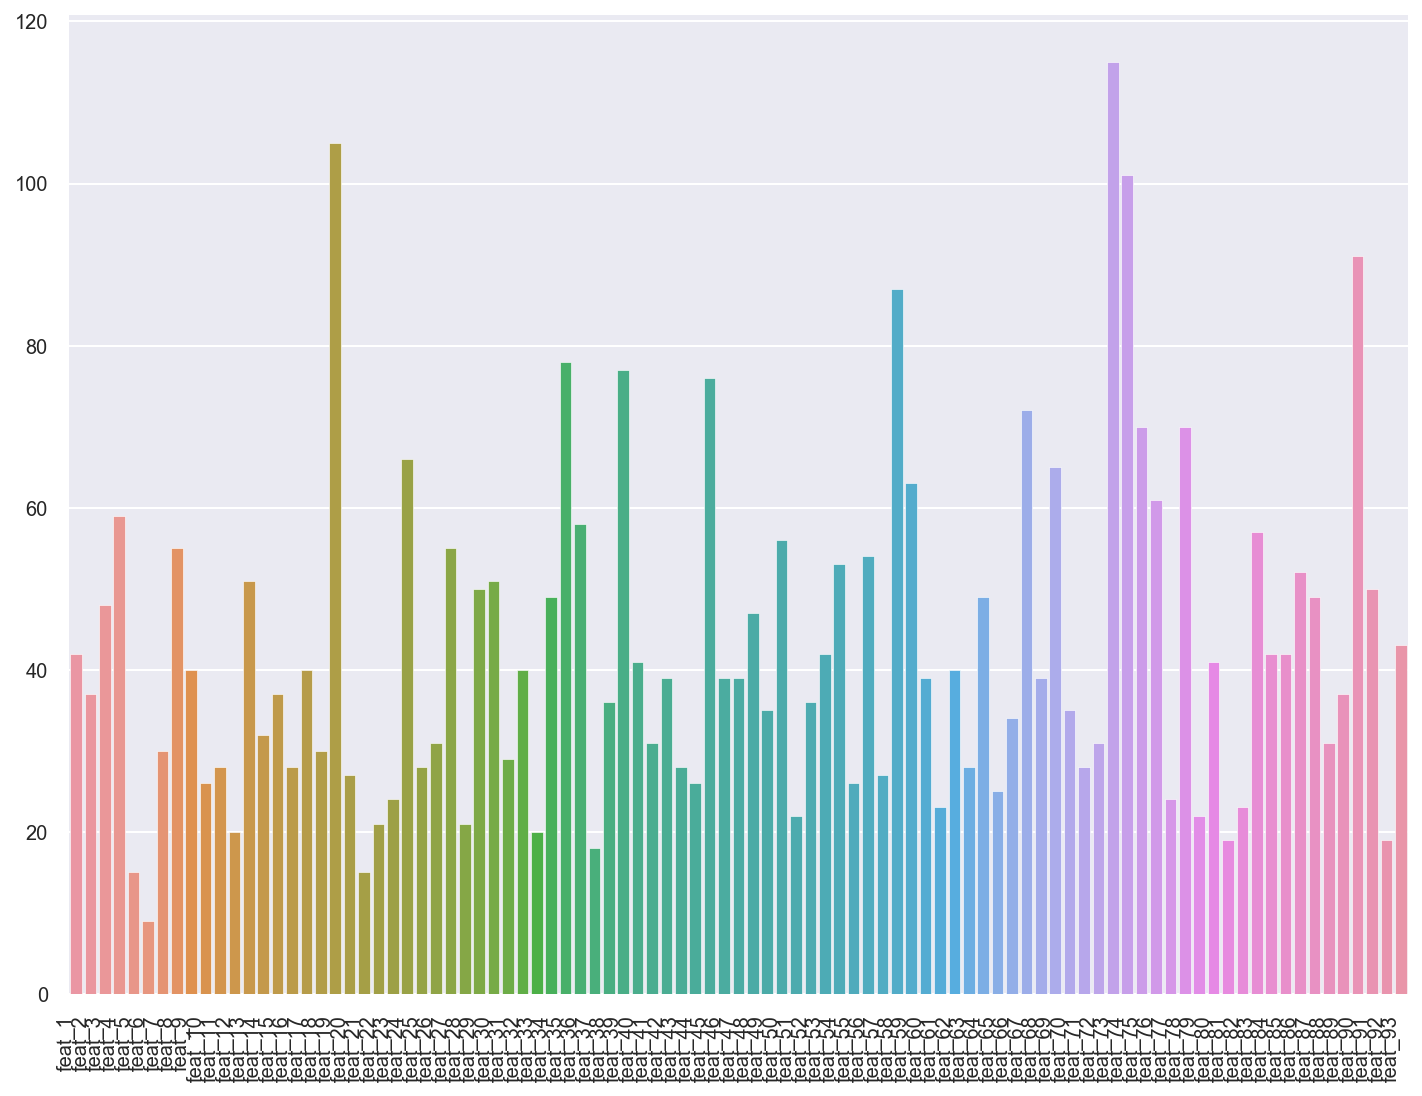

In [6]:
unique_counts = dataset.iloc[:,1:-1].nunique()
ax = sns.barplot(x=unique_counts.index, y=unique_counts.values);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Generate profile

In [9]:
profile = ProfileReport(dataset, title='Dataset report', html={'style':{'full_width':True}})

In [10]:
profile.to_file(output_file="dataset_report.html")

## t-SNE

In [11]:
# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=400)
tsne_results = tsne.fit_transform(dataset.iloc[:,1:-1])

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 61878 samples in 4.027s...
[t-SNE] Computed neighbors for 61878 samples in 635.579s...
[t-SNE] Computed conditional probabilities for sample 1000 / 61878
[t-SNE] Computed conditional probabilities for sample 2000 / 61878
[t-SNE] Computed conditional probabilities for sample 3000 / 61878
[t-SNE] Computed conditional probabilities for sample 4000 / 61878
[t-SNE] Computed conditional probabilities for sample 5000 / 61878
[t-SNE] Computed conditional probabilities for sample 6000 / 61878
[t-SNE] Computed conditional probabilities for sample 7000 / 61878
[t-SNE] Computed conditional probabilities for sample 8000 / 61878
[t-SNE] Computed conditional probabilities for sample 9000 / 61878
[t-SNE] Computed conditional probabilities for sample 10000 / 61878
[t-SNE] Computed conditional probabilities for sample 11000 / 61878
[t-SNE] Computed conditional probabilities for sample 12000 / 61878
[t-SNE] Computed conditional probabilities for 

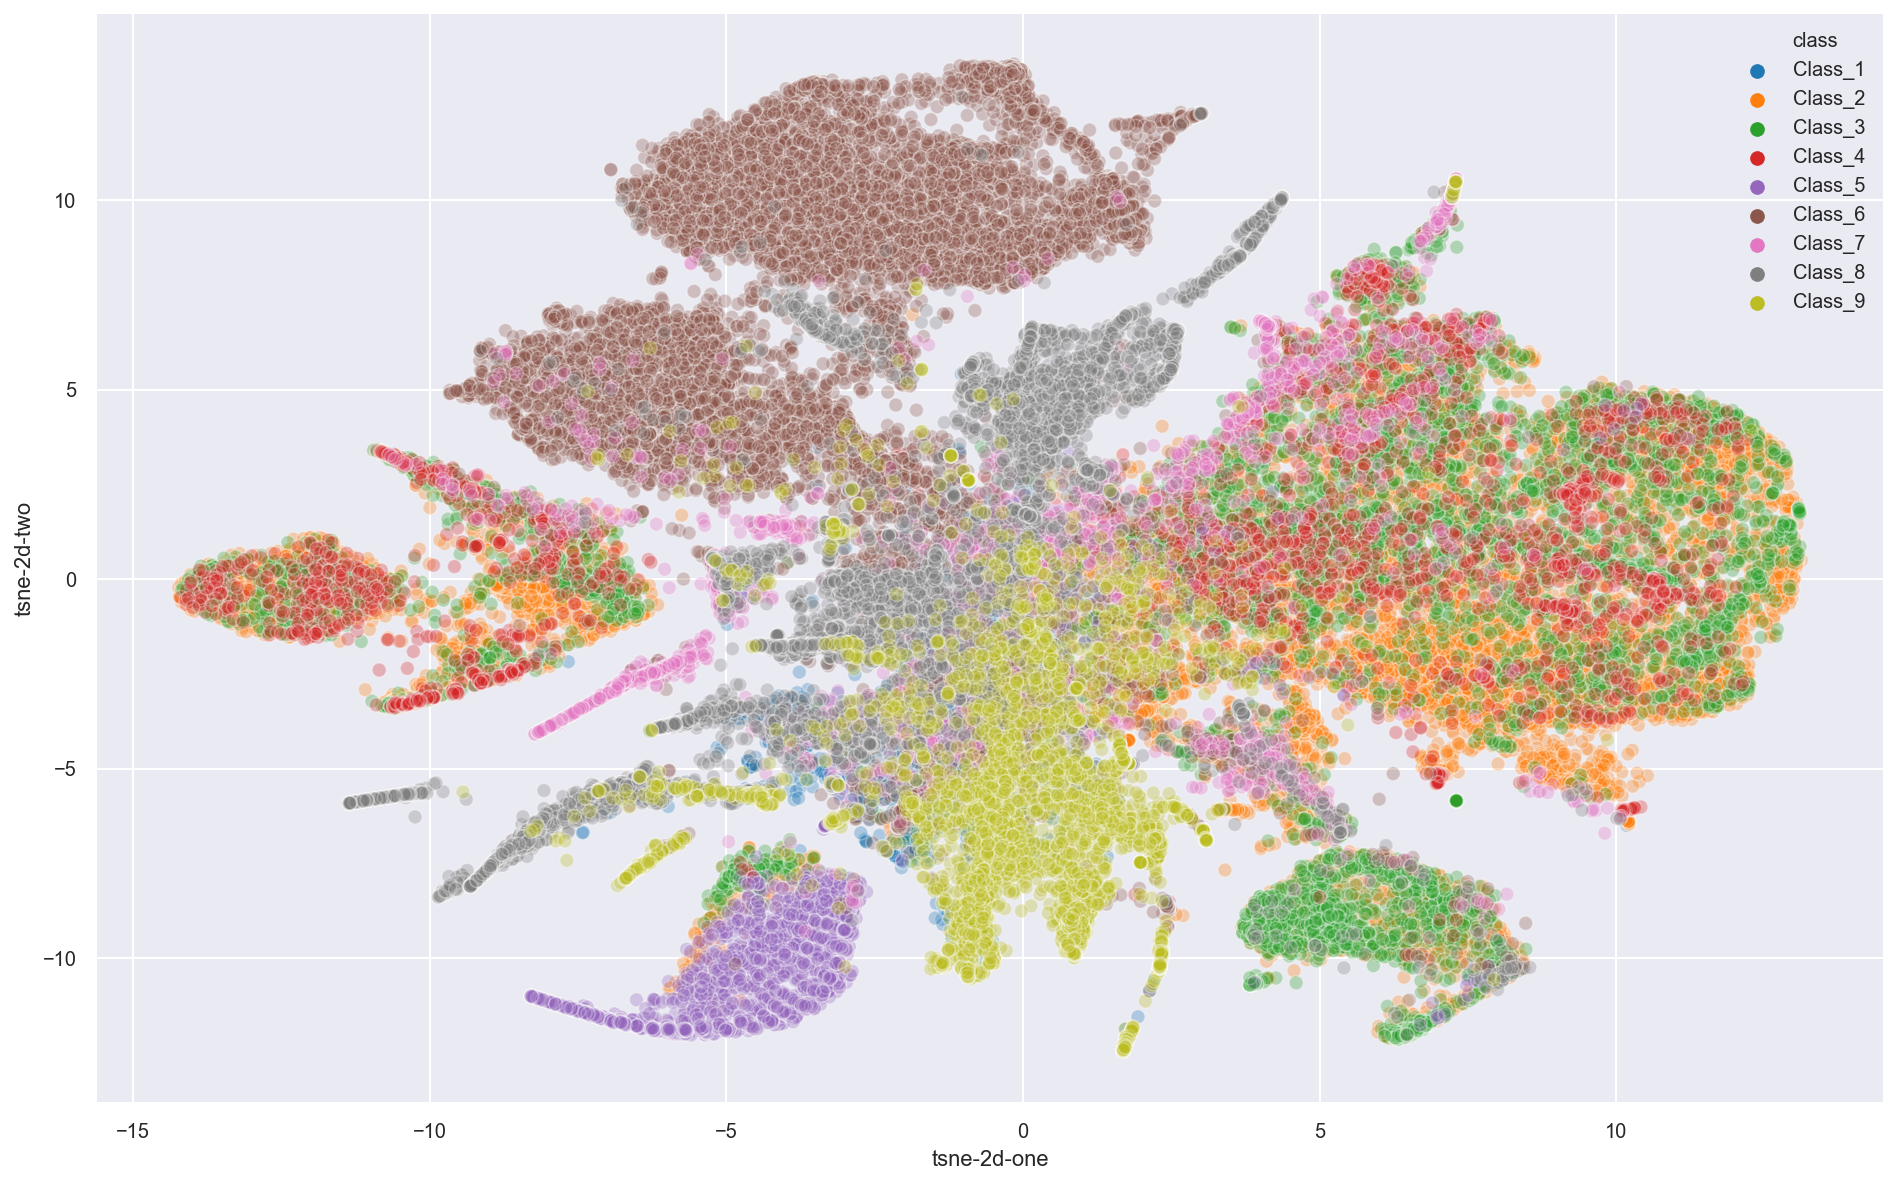

In [12]:
tsne_df = pd.DataFrame()

tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df['class'] = dataset[column_name_classes]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='class',
    data=tsne_df,
    legend="full",
    alpha=0.3
);

## correlation matrix

In [13]:
# plot correlation matrix
def plot_correlation(df, threshold_low=0, threshold_high=0):
    
    corr = df.corr()
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(
        corr[(corr >= threshold_high) | (corr <= threshold_low)], 
        vmin=-1, vmax=1, center=0,
        linewidths=0.1,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

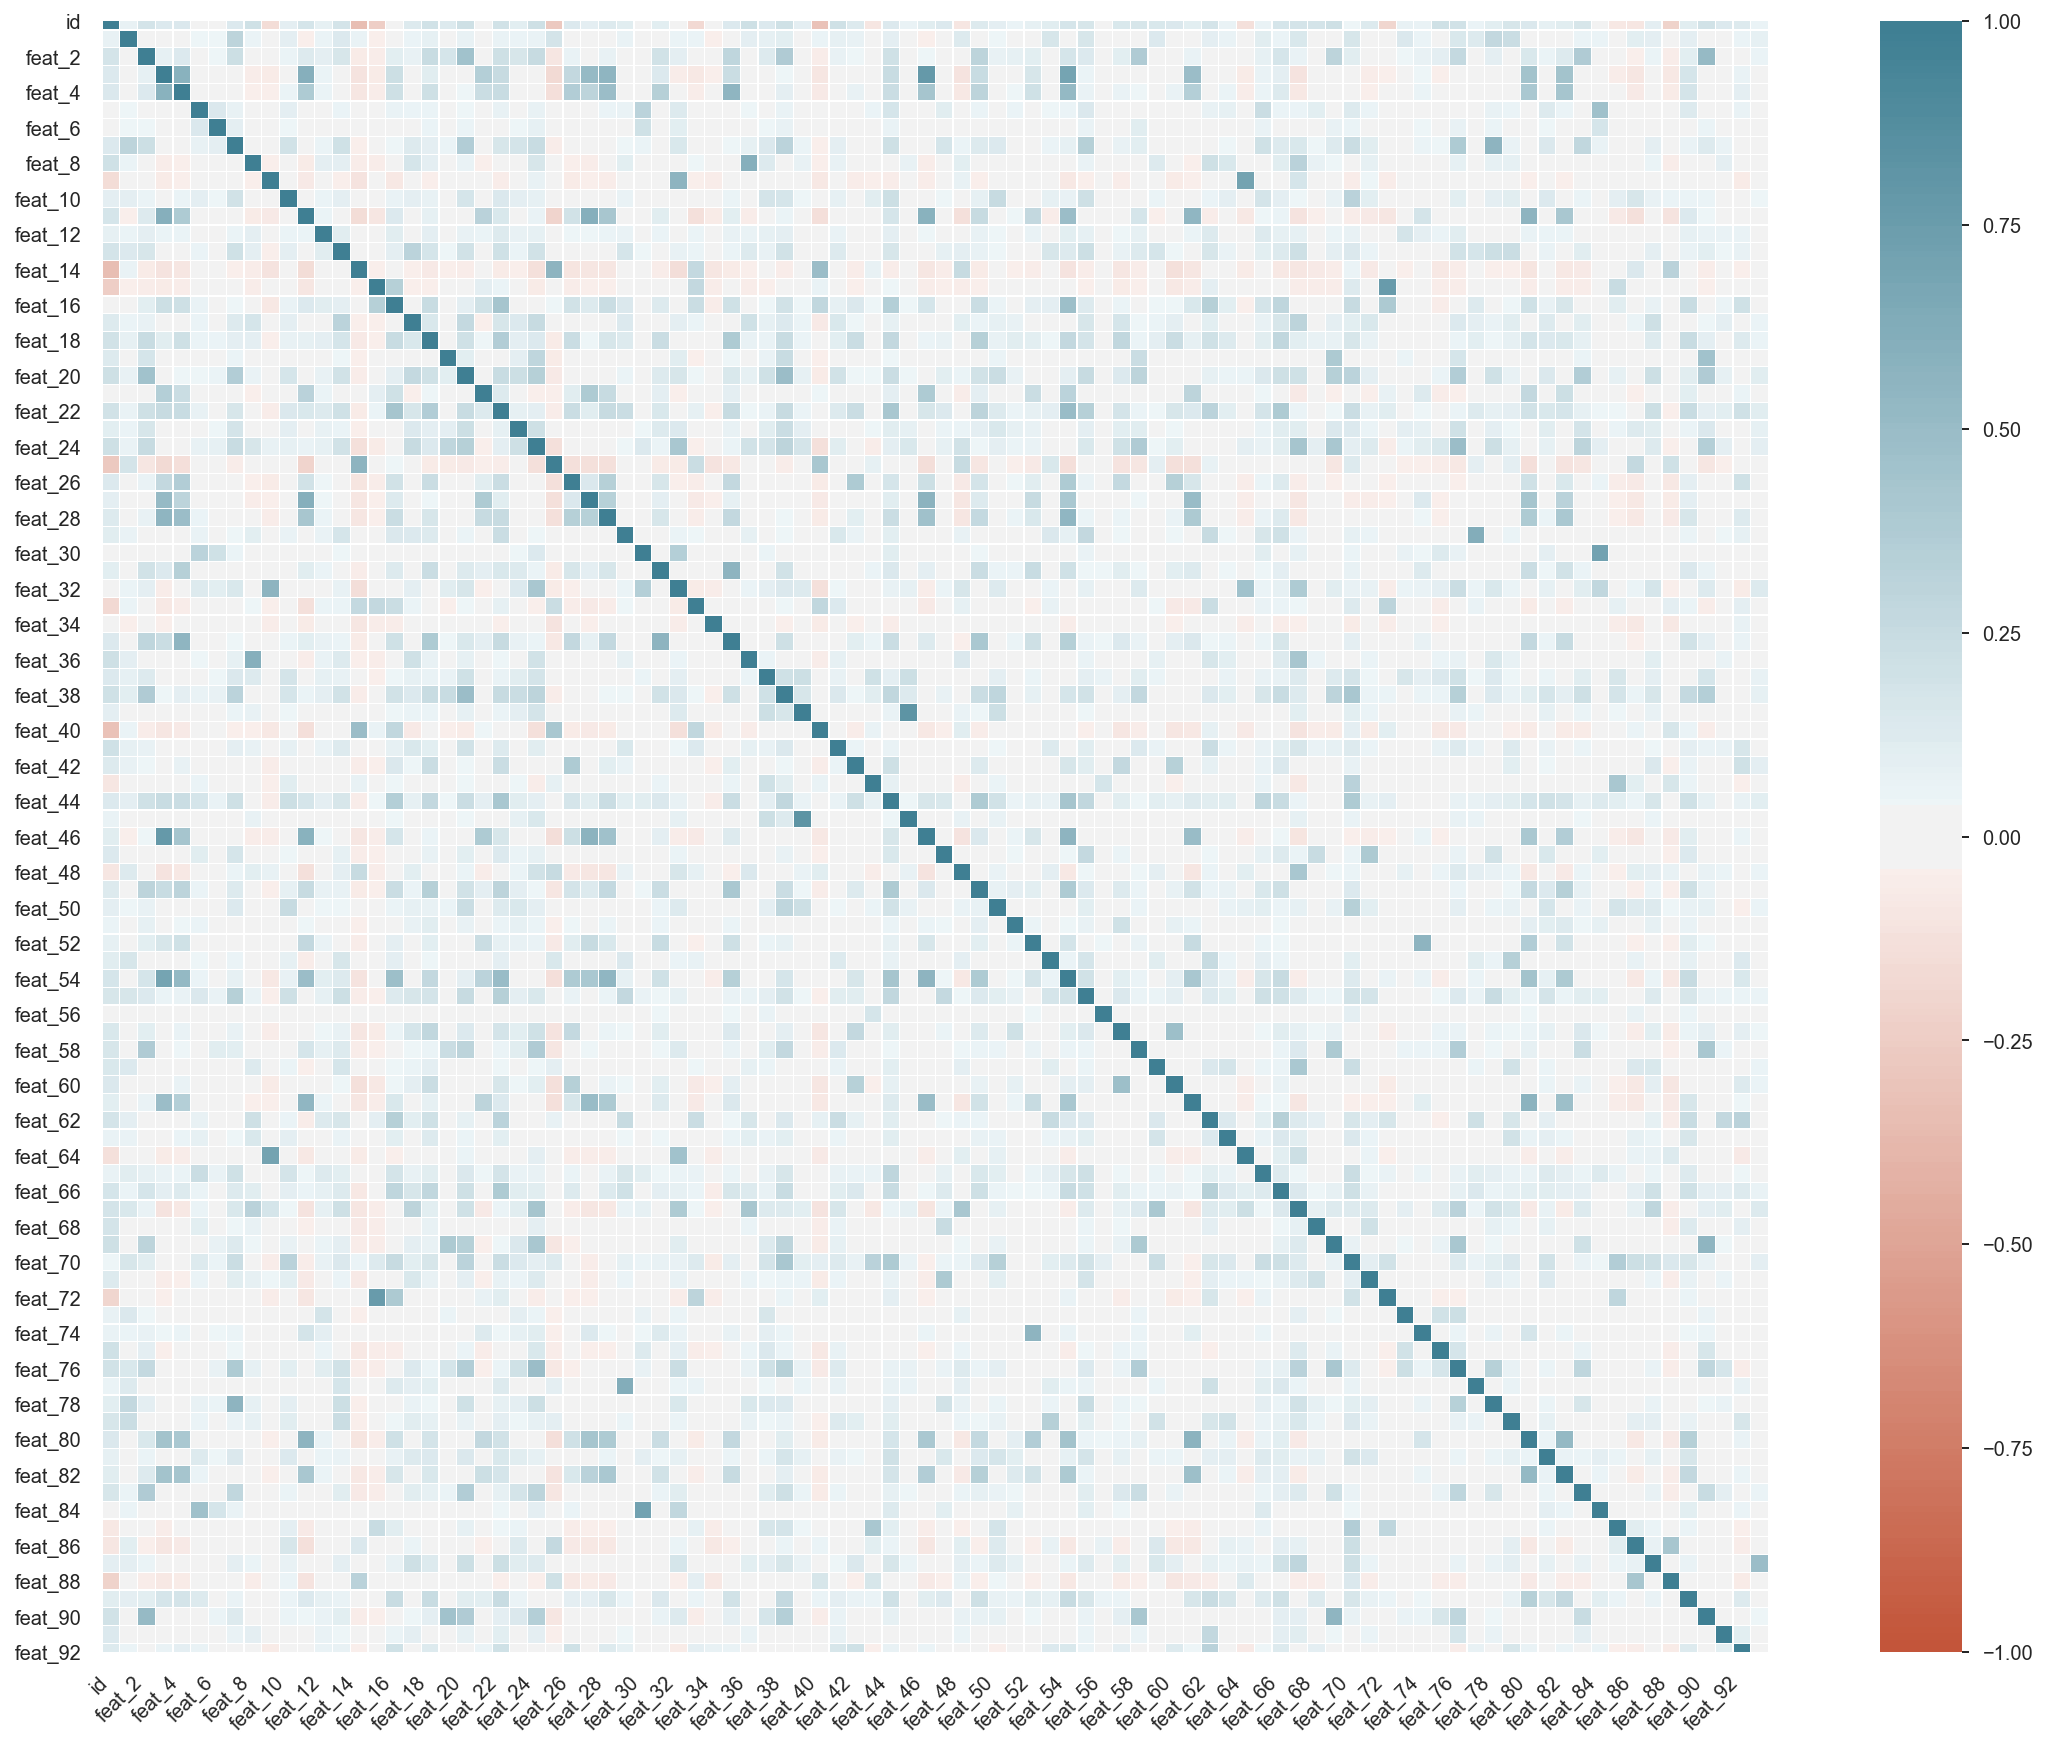

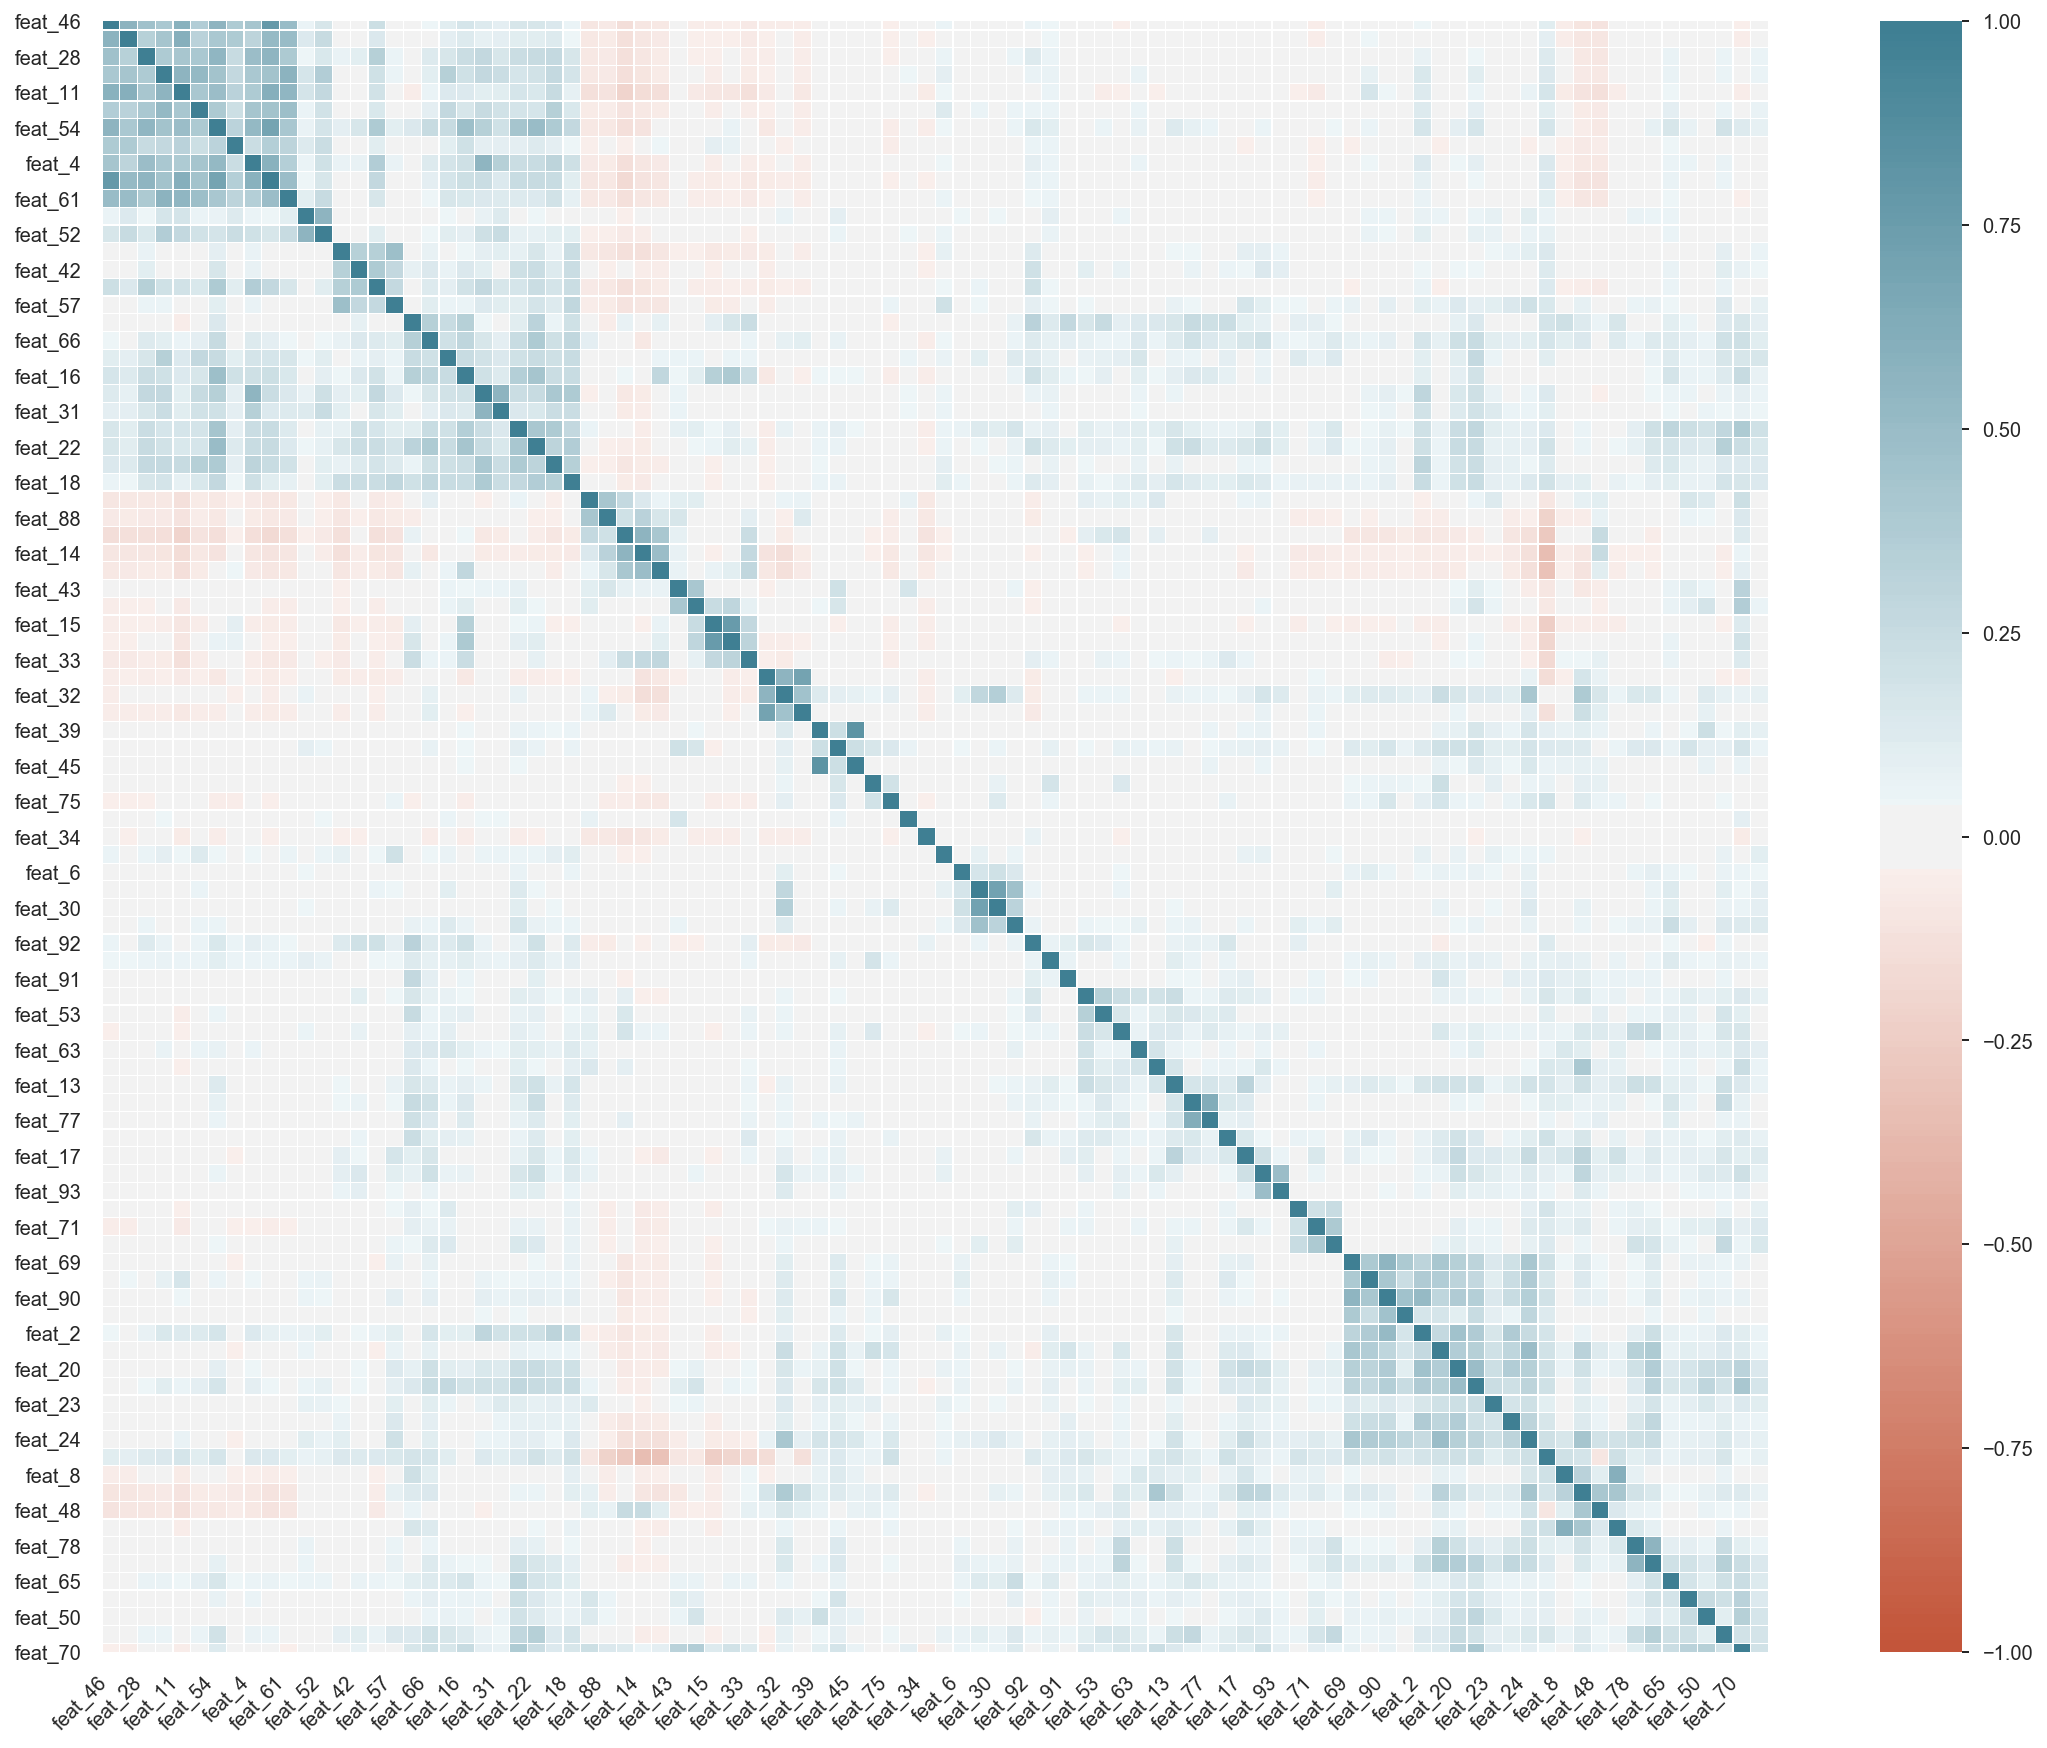

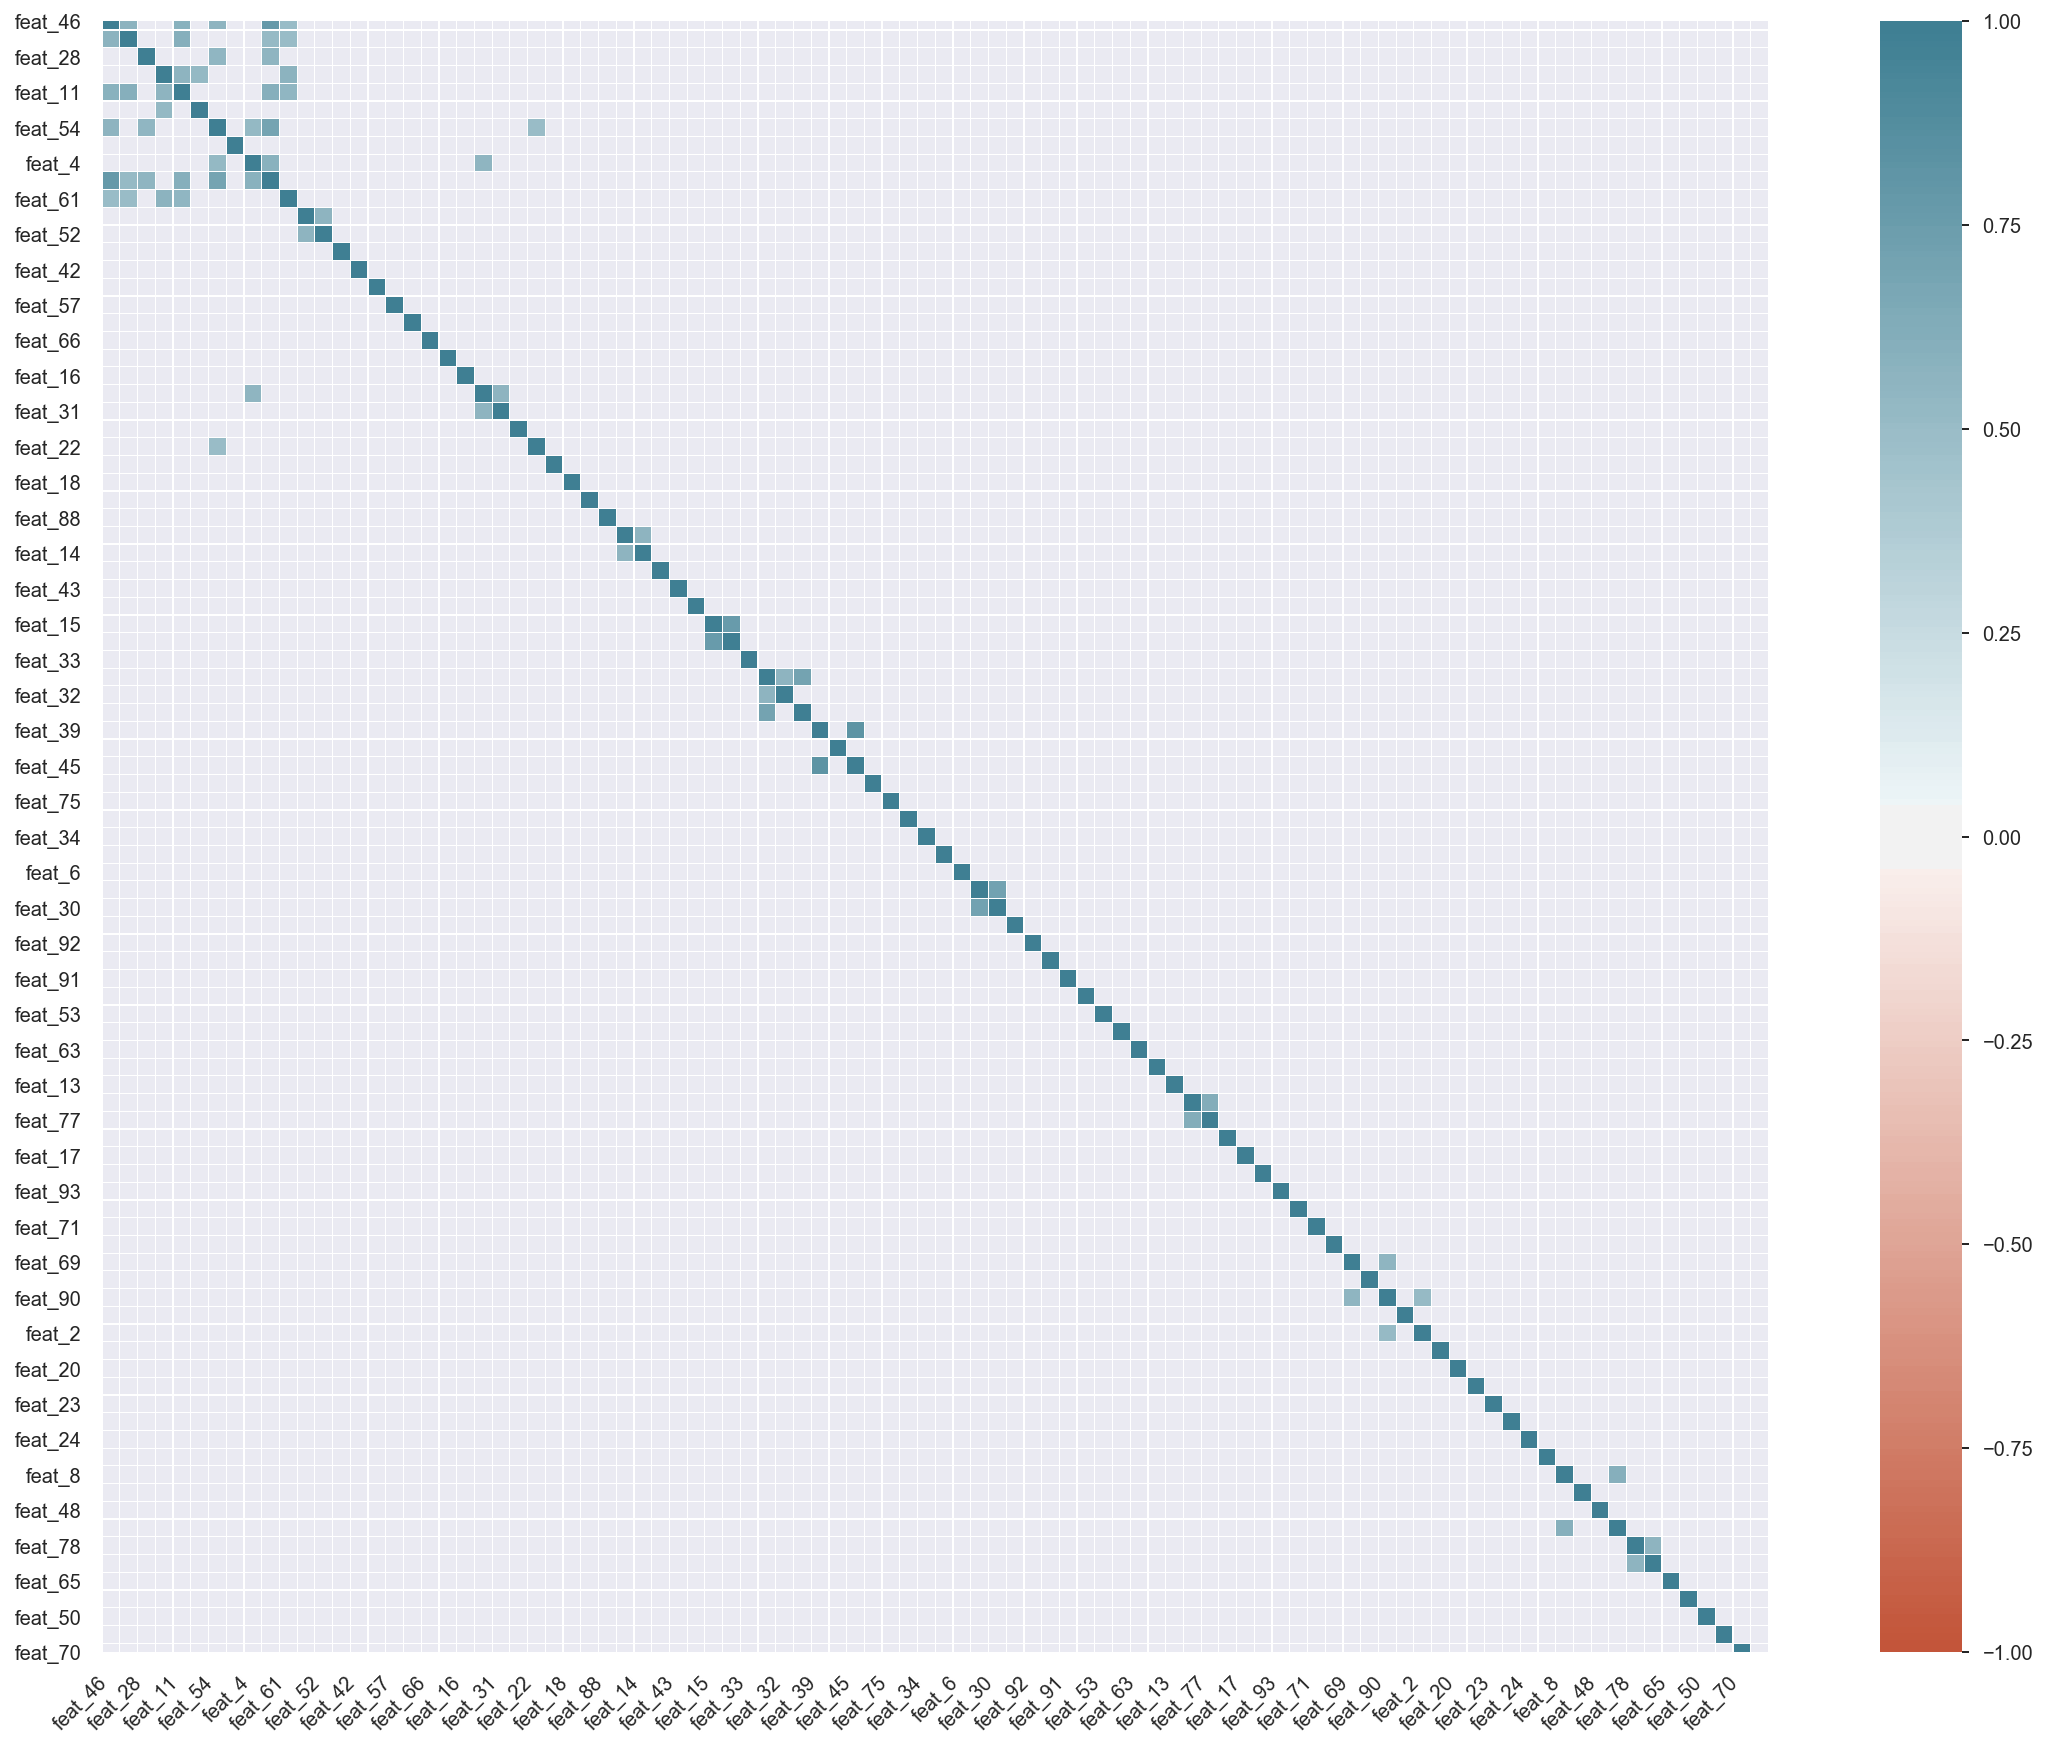

In [14]:
import scipy.cluster.hierarchy as spc

corr = dataset.corr()
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
columns = [dataset.columns.tolist()[i] for i in list((np.argsort(idx)))]

plot_correlation(dataset)
plot_correlation(dataset[columns])
plot_correlation(dataset[columns], threshold_low = -0.5, threshold_high = 0.5)

# Investigate one feature

In [15]:
feature_name = 'feat_1'
feature = dataset[feature_name]

In [16]:
print(feature.describe())
print("unique:", feature.nunique())

count    61878.00000
mean         0.38668
std          1.52533
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         61.00000
Name: feat_1, dtype: float64
unique: 42


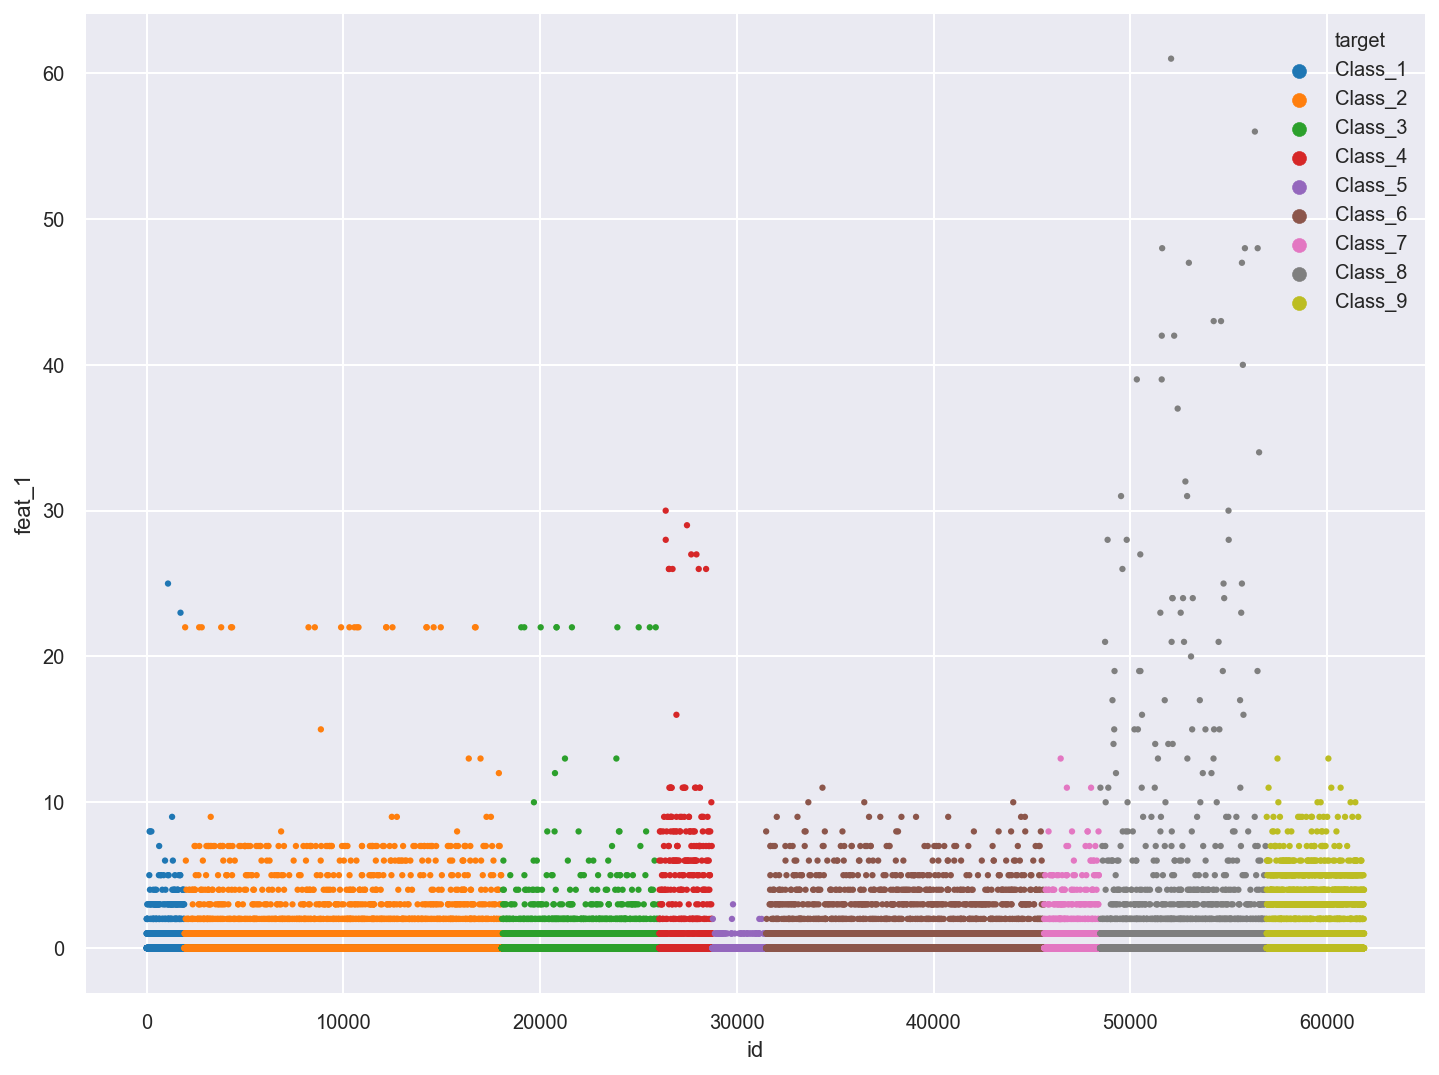

In [17]:
sns.scatterplot(x='id', y=feature_name, hue=column_name_classes, data=dataset, markers='.', s=10, linewidth=0);

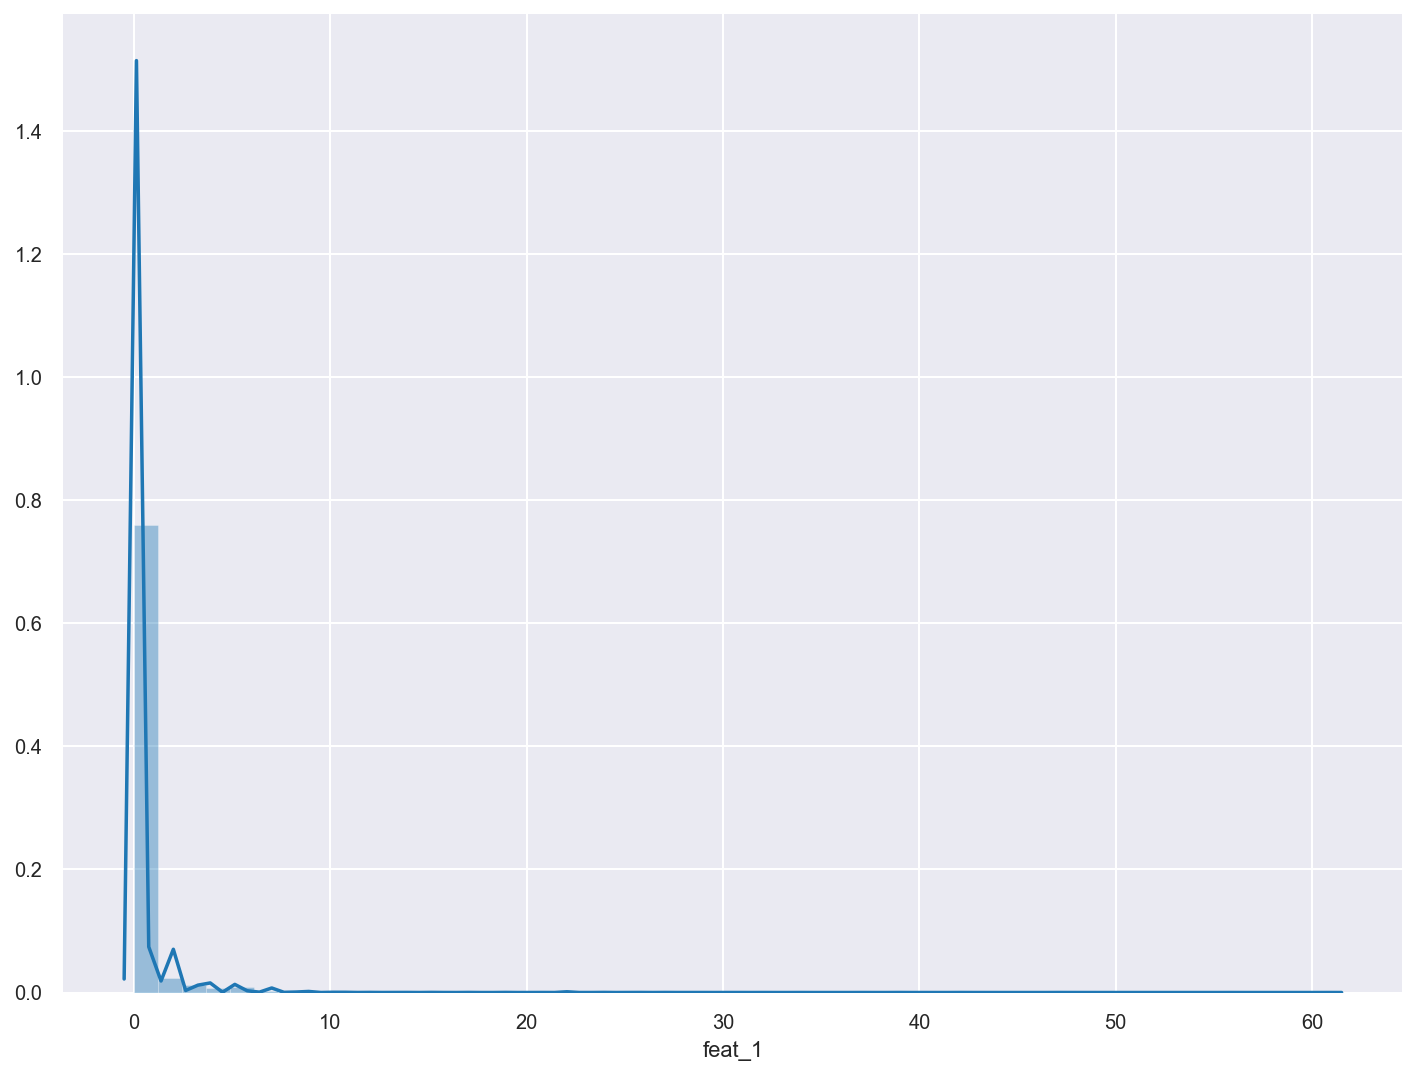

In [18]:
sns.distplot(feature);

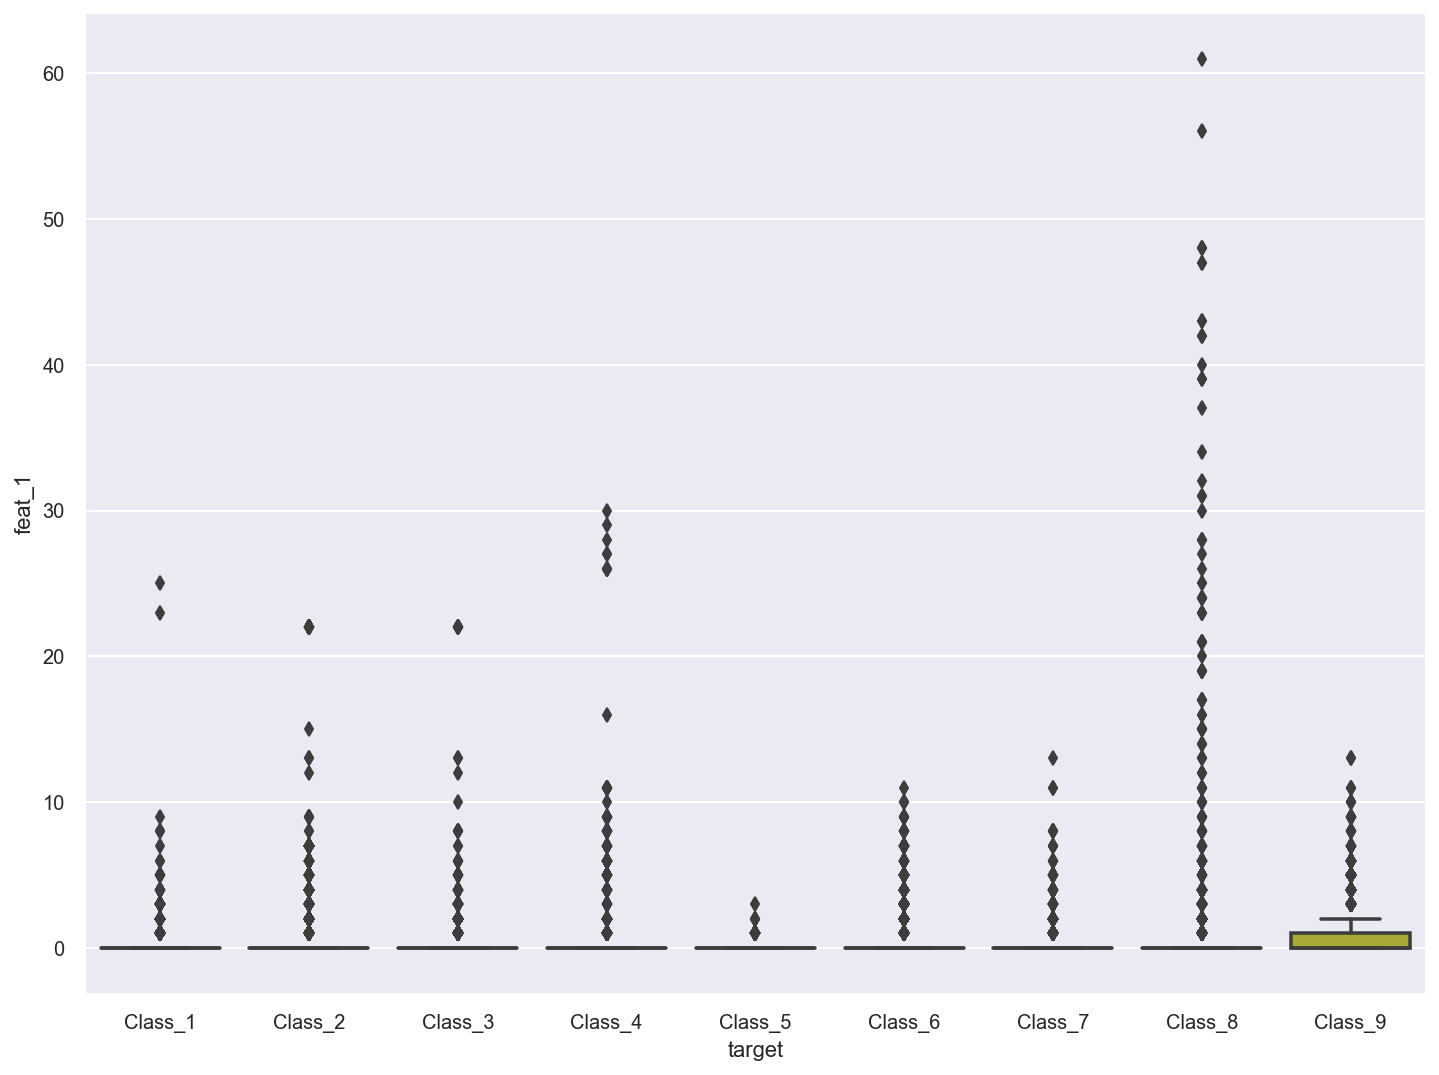

In [19]:
sns.boxplot(x=column_name_classes, y=feature_name, data=dataset);

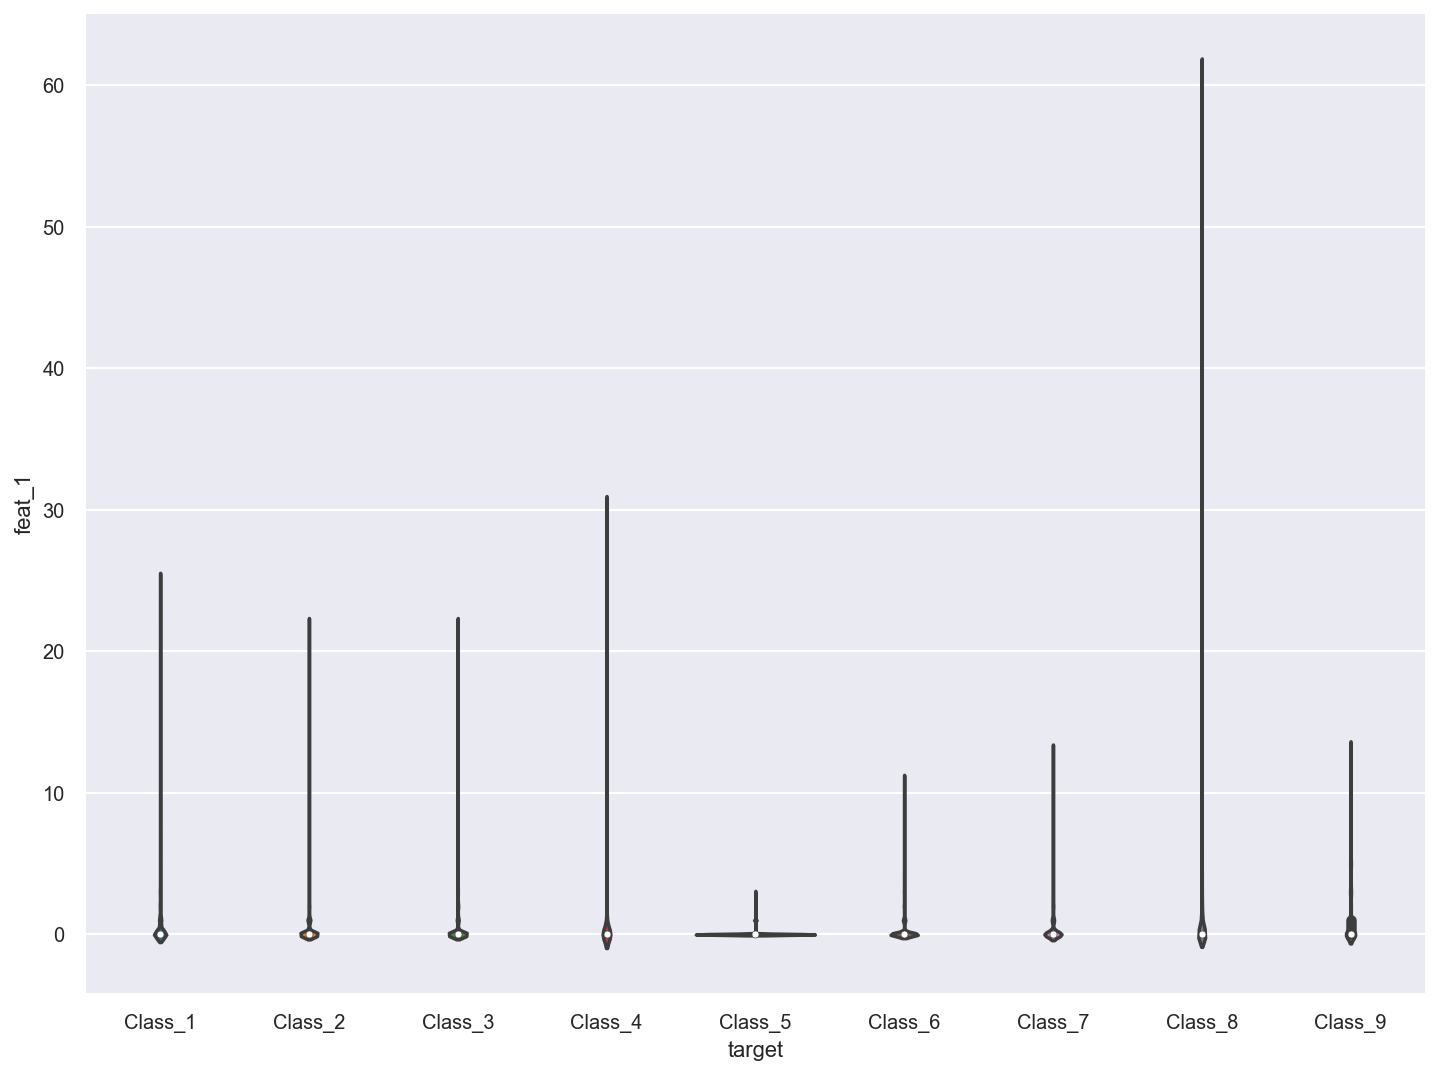

In [20]:
sns.violinplot(x=column_name_classes, y=feature_name, data=dataset);

# Two features compared

In [21]:
feature_names = ['feat_1', 'feat_2']

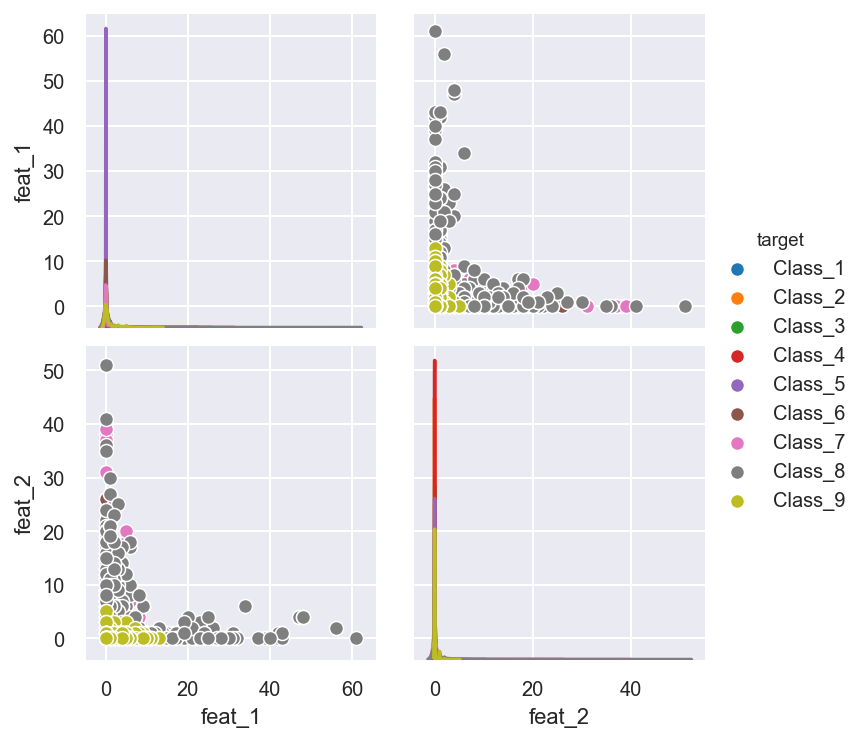

In [22]:
sns.pairplot(dataset, hue=column_name_classes, vars=feature_names);

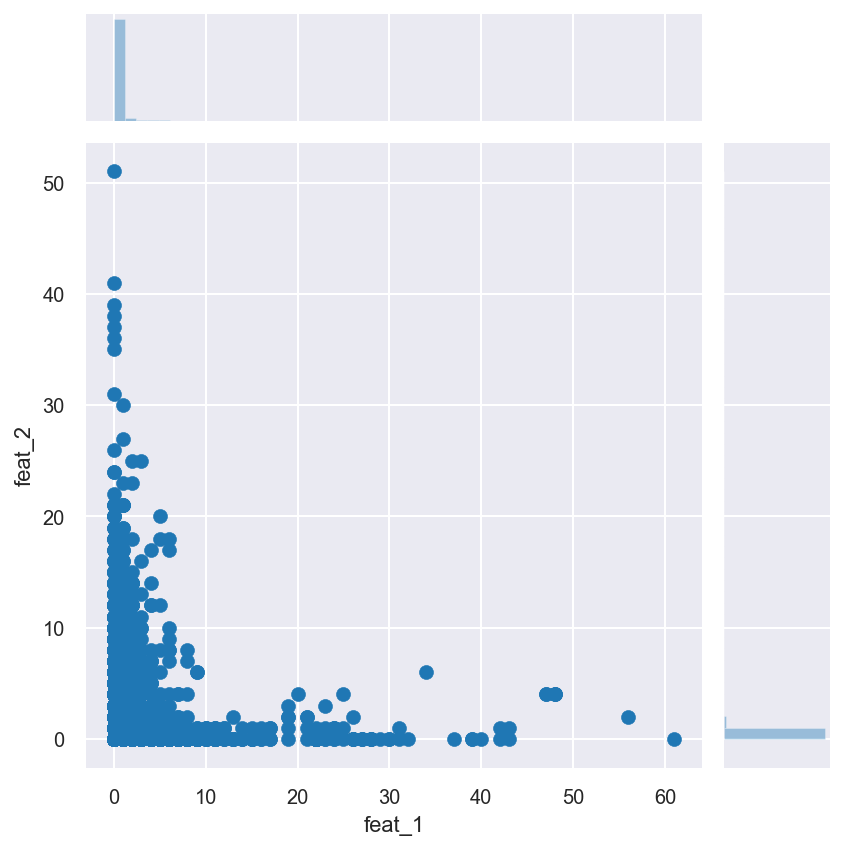

In [23]:
sns.jointplot(x=feature_names[0], y=feature_names[1], data=dataset);